# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [3]:
data = pd.DataFrame(X,columns=data["feature_names"])

In [4]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [6]:
df = data.drop(columns=["hue","od280/od315_of_diluted_wines","total_phenols"])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,proline
0,14.23,1.71,2.43,15.6,127.0,3.06,0.28,2.29,5.64,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.76,0.26,1.28,4.38,1050.0
2,13.16,2.36,2.67,18.6,101.0,3.24,0.30,2.81,5.68,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.49,0.24,2.18,7.80,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.69,0.39,1.82,4.32,735.0


## 1. Train a [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering model on the data set using 8 clusters and compute the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for the model.

In [32]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,1.034819,-0.659563,1.224884,0.251717,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.733629,-0.820719,-0.544721,-0.293321,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,1.215533,-0.498407,2.135968,0.269020,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,1.466525,-0.981875,1.032155,1.186068,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.663351,0.226796,0.401404,-0.319276,-0.037874


In [33]:
km = KMeans(n_clusters=8)
km.fit(df)

KMeans()

In [34]:
y_pred = km.predict(df)
y_pred

array([4, 4, 0, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 0,
       4, 0, 0, 0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 3,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 7, 1, 1, 7, 7, 1, 3,
       7, 7, 1, 3, 1, 6, 6, 0, 3, 7, 7, 1, 3, 6, 7, 7, 6, 2, 3, 7, 6, 6,
       6, 6, 6, 6, 6, 7, 7, 3, 3, 7, 7, 3, 7, 7, 6, 7, 7, 6, 7, 6, 7, 3,
       3, 7, 1, 6, 6, 6, 7, 6, 7, 7, 3, 0, 6, 2, 3, 6, 6, 6, 6, 6, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 5, 2, 2, 2, 5, 5, 5, 5, 5, 5,
       1, 2, 5, 2, 5, 5, 2, 2, 2, 1, 5, 2, 5, 5, 5, 5, 1, 5, 5, 2, 5, 5,
       5, 5], dtype=int32)

In [36]:
silhouette_score(df, y_pred)

0.159601130083589

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [37]:
km_5 = KMeans(n_clusters=5)
km_5.fit(df)

KMeans(n_clusters=5)

In [40]:
y_pred_5 = km.predict(df)
y_pred_5

array([4, 4, 0, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 0,
       4, 0, 0, 0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 3,
       4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 0, 4, 7, 1, 1, 7, 7, 1, 3,
       7, 7, 1, 3, 1, 6, 6, 0, 3, 7, 7, 1, 3, 6, 7, 7, 6, 2, 3, 7, 6, 6,
       6, 6, 6, 6, 6, 7, 7, 3, 3, 7, 7, 3, 7, 7, 6, 7, 7, 6, 7, 6, 7, 3,
       3, 7, 1, 6, 6, 6, 7, 6, 7, 7, 3, 0, 6, 2, 3, 6, 6, 6, 6, 6, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 5, 2, 2, 2, 5, 5, 5, 5, 5, 5,
       1, 2, 5, 2, 5, 5, 2, 2, 2, 1, 5, 2, 5, 5, 5, 5, 1, 5, 5, 2, 5, 5,
       5, 5], dtype=int32)

In [41]:
silhouette_score(df, y_pred_5)

0.159601130083589

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [51]:
km_3 = KMeans(n_clusters=3)
km_3.fit(df)

KMeans(n_clusters=3)

In [52]:
y_pred_3 = km_3.predict(df)
y_pred_3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [53]:
silhouette_score(df, y_pred_3)

0.2739277611993209

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

In [54]:
kmeans = [KMeans(n_clusters=i) for i in range(1,11)]
for model in kmeans:
    model.fit(df)

In [55]:
inertias = [model.inertia_ for model in kmeans]
inertias[:3]

[1779.9999999999998, 1333.036253879813, 1052.6081697794616]

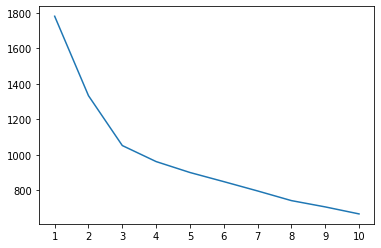

In [56]:
plt.plot(range(1,11),inertias)
plt.xticks(range(1,11));

## 5. Try performing the same elbow tests with an [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) model and compare the results you get to the KMeans results.

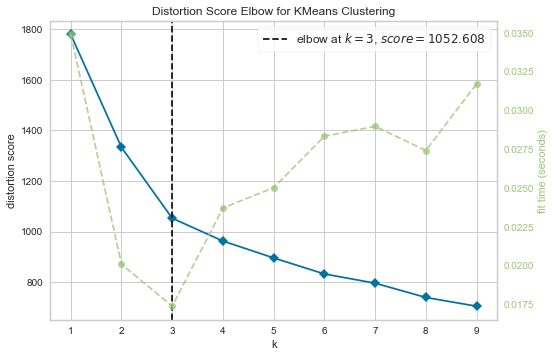

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df)
visualizer.show()

**The graph indicates that 3 is a good clusters number.**

## 6. Create and plot a scatter matrix (pairplot) showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [64]:
data_complete = X
data_complete["target"] = y_pred_3
data_complete.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


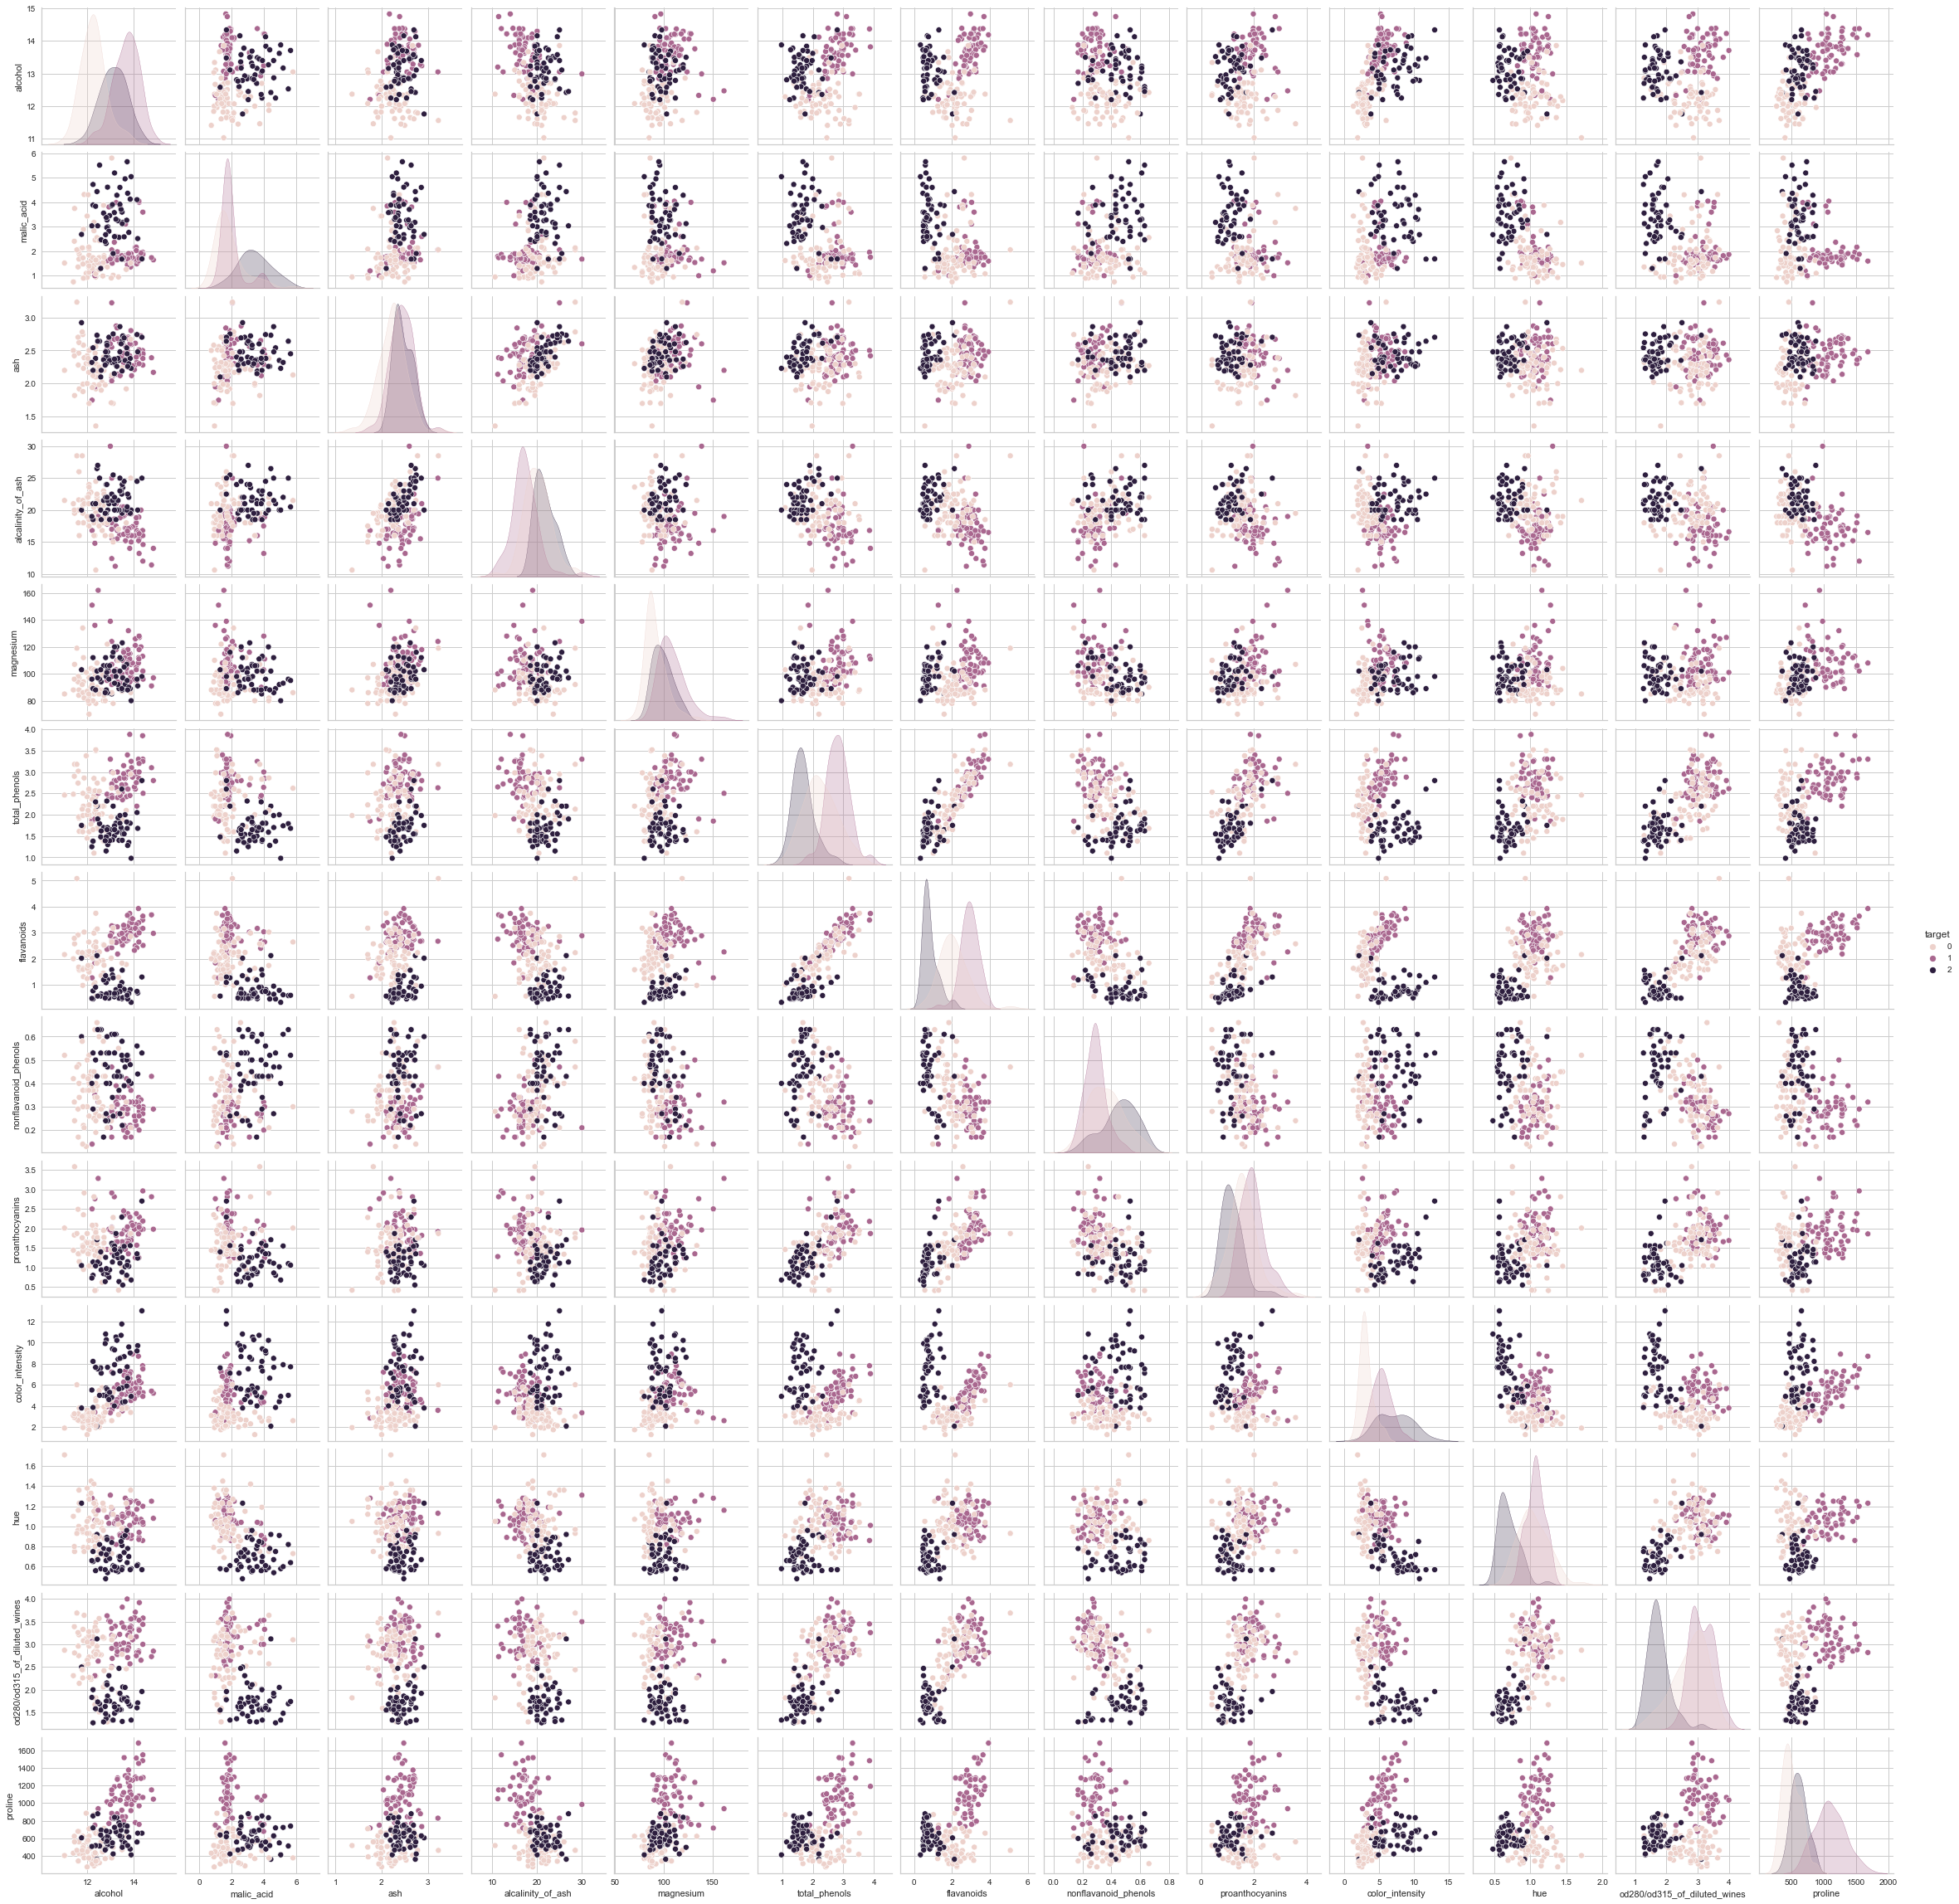

In [65]:
sns.pairplot(data_complete, hue = "target")

## 7. Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) transform and plot the first two principle components with the plot point colors determined by cluster.

In [68]:
pca = PCA(2)
wine_t = pd.DataFrame(pca.fit_transform(X), columns = ["PC1","PC2"])
wine_t["group"] = y_pred_3

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


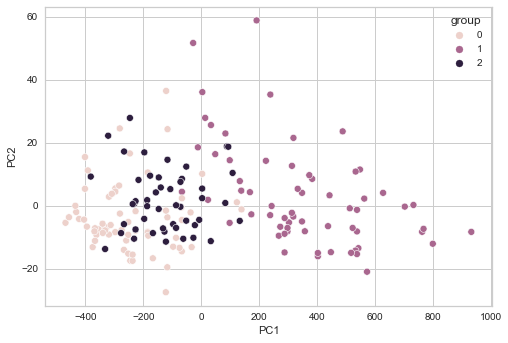

In [69]:
pca_wine = sns.scatterplot(wine_t["PC1"], wine_t["PC2"], hue = wine_t["group"])

## 8. Generate a series of [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) plots showing the clusters at a variety of perplexities.